# Logistic Regression from Scratch
---
#### In this notebook we will be implementing the **logistic regression** algorithm using just NumPy.

Logistic regression is a machine learning algorithm that is used to classify objects into two classes (binary classification)  

- Yes or No
- Spam or Not Spam
- Disease or No Disease <br>  
<br>
This is a supervised learning algorithm. This means we feed it data that we already know the category/labels of. The algorithms learn from this data. It tunes its parameters (weights and bias) such that the function is able to correctly categorize as many of the training data as possible. <br>
Well, in reality, the logistic regression algorithm tries to minimize the cost associated with wrong predictions. (And thats true for pretty much all machine learning algorithms) <br>
---
The logistic regression algorithm used to be one of the fundamental concepts powering Neural Networks. Regardless, the essence of this algorithm captures the core mechanics of how models learn. <br>
<br>
Our goal is to understand the main ideas behind logistic regression. For this reason, this notebook sticks to the bare essentials, the core mechanics behind logistic regression. <br><br>

## Generating training data

Let's say we have 5 training examples, each having 3 features. 
We'll stack them as column vectors in a matrix `X`. 
Their corresponding binary labels will be in a horizontal array `Y`. <br>

X:
\begin{bmatrix}
\vert & \vert & \vert & \vert & \vert \\
x_1 & x_2 & x_3 & x_4 & x_5 \\
\vert & \vert & \vert & \vert & \vert \\
\end{bmatrix}

Y:
\begin{bmatrix} y_1 & y_2 & y_3 & y_4 & y_5 \end{bmatrix}


Note on notation: <br>
Don't get hung up on the notation and terminology. 
Some people prefer to have the training data stacked as rows. 
At the end of the day, it doesn't matter as long as the calculations are correct.

In [1]:
import numpy as np

X = np.array([
    [0.1, 0.2, 0.7, 0.9, 0.3],
    [0.8, 0.7, 0.4, 0.1, 0.9],
    [0.9, 0.7, 0.1, 0.2, 0.9]
])

Y = np.array([0., 0., 1., 1., 0.])

X, Y

(array([[0.1, 0.2, 0.7, 0.9, 0.3],
        [0.8, 0.7, 0.4, 0.1, 0.9],
        [0.9, 0.7, 0.1, 0.2, 0.9]]),
 array([0., 0., 1., 1., 0.]))

### Initializing weights and bias

Our algortihm has 3 weights (corrisponding to the number of features), and a bias to work with. The algorithm will tune these parameters in order to minimize the loss on the training data

In [2]:
W = np.random.randn(3,1)
b = 1.
W, b

(array([[ 1.46448289],
        [-0.54167159],
        [ 1.05614313]]),
 1.0)

## Sigmoid function

At the heart of logistic regression is the sigmoid function. <br>
The sigmoid function basically takes in real number (output of a line in our case), and squashes it between 0 and 1. These then act as probabilities, through which we can predict the class of similar data.<br>

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Let's visualize the sigmoid function

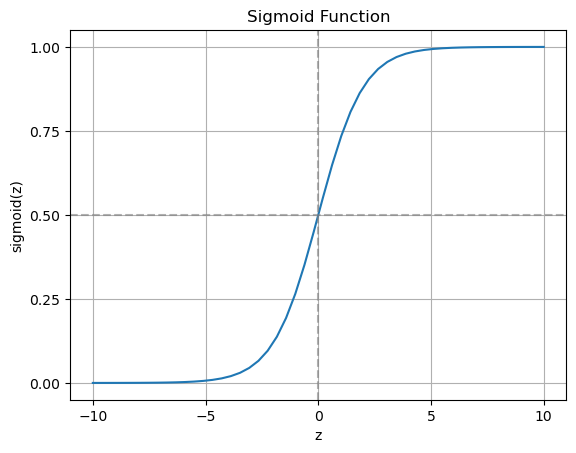

In [4]:
import matplotlib.pyplot as plt 

plt.plot(np.linspace(-10,10,50), sigmoid(np.linspace(-10,10,50)))
plt.axhline(0.5, linestyle='--', color='gray', alpha=0.6)
plt.axvline(0, linestyle='--', color='gray', alpha=0.6)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.xticks(np.arange(-10, 10.1, 5))
plt.yticks(np.arange(0, 1.1, 0.25))
plt.grid(True);

## Loss Function

We next define the loss function. This function basically tells us how bad our predictions are relative to the actual ground truth. <br>
For logistic regression, the loss for a single prediction is:

$$
\mathcal{L}(y, \hat{y}) = -\left[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})\right]
$$
This is called the binary cross-entropy loss. <br>
The reason for having this loss function (as opposed to someting simpler like the square residuals) is that for logistic regression, this is a convex function. <br>
This means that the loss function has one single global minimum, an no local minimas. This means that the loss is guaranteed to converge

In [5]:
def Loss(A, Y):
    # A = predicted probabilities (from sigmoid)
    # Y = true labels
    return -(Y*np.log(A) + (1 - Y)*np.log(1 - A))

#### Let's look at the loss of our unoptimized function

In [6]:
A = sigmoid((W.T @ X) + b)
print(f"Predictions: {A.round(3)}")
print(f"Ground Truth: {Y}")

Predictions: [[0.841 0.839 0.871 0.922 0.87 ]]
Ground Truth: [0. 0. 1. 1. 0.]


In [7]:
print("Loss of every sample")
Loss(A, Y)

Loss of every sample


array([[1.8371293 , 1.82821409, 0.13756554, 0.08080079, 2.04144806]])

## Cost Function
We will average the losses across all samples, to get a sense of how bad our model does overall

In [8]:
def Cost(L):
    # L = loss of every sample
    return np.average(L)

In [9]:
print("Cost:")
Cost(Loss(A, Y))

Cost:


1.1850315563929938

## Learning
We will now train our model. This means that we will optimize the weights and bias, based on the training data. <br>
<br>
We will find the gradient of our loss with respect to the weights and bias. Each of our training example will give a diffenrent set of gradients. We will then sum all of these up, and nudge the weights and bias in the opposite direction. This will ensure that our function performs a little bit better overall. In other words, we will reduce the cost of our function. <br>
We will perform this a number of times, and hopefully at the end, our function will have very less cost. <br>
This algorithm of finding the gradient of the cost function and nudging the parameters in the opposite direction, thus reducing the cost, is also known as Gradient Descent.

Before that, lets look at our unoptimized weights and bias

In [10]:
W, b

(array([[ 1.46448289],
        [-0.54167159],
        [ 1.05614313]]),
 1.0)

### Training with Gradient Descent
We’ll perform gradient descent for 20 iterations. 

In [11]:
costs = []

for epoch in range(20): 
    
    # Initial predictions
    A = sigmoid(W.T @ X + b)

    # Gradient calculation
    dw = (A - Y) * X # w.r.t the weights
    dw = np.sum(dw, axis=1, keepdims=True)
    db = (A - Y) # w.r.t the bias
    db = np.sum(db, axis=1)
    
    # Updating the parameters, in order to reduce the total cost
    W -= dw
    b -= db

    # Tracking the cost 
    cost = Cost(Loss(A, Y))
    costs.append(cost)

    print(f"{epoch=}")
    print(f"{cost=}")
    print("==========")

epoch=0
cost=1.1850315563929938
epoch=1
cost=0.6164020890151733
epoch=2
cost=0.1936066439634284
epoch=3
cost=0.16108606248600893
epoch=4
cost=0.1380858208345952
epoch=5
cost=0.1208359675956979
epoch=6
cost=0.10742277822888799
epoch=7
cost=0.09669960759963682
epoch=8
cost=0.08793331174420244
epoch=9
cost=0.08063404889989093
epoch=10
cost=0.07446242403035946
epoch=11
cost=0.06917600834600099
epoch=12
cost=0.0645970979764962
epoch=13
cost=0.06059250632633334
epoch=14
cost=0.057060467968060545
epoch=15
cost=0.0539219012716712
epoch=16
cost=0.05111442888109824
epoch=17
cost=0.048588192622855415
epoch=18
cost=0.046302865278671446
epoch=19
cost=0.04422547848680353


Our cost has recduced significantly (approxamitly 30x). But what does this mean for our predictions? <br>
Let's first take a look at our learned weights and bias.

In [12]:
W, b

(array([[ 4.57127264],
        [-3.44530906],
        [-3.02136813]]),
 array([0.76891735]))

### Visualizing Cost Reduction 

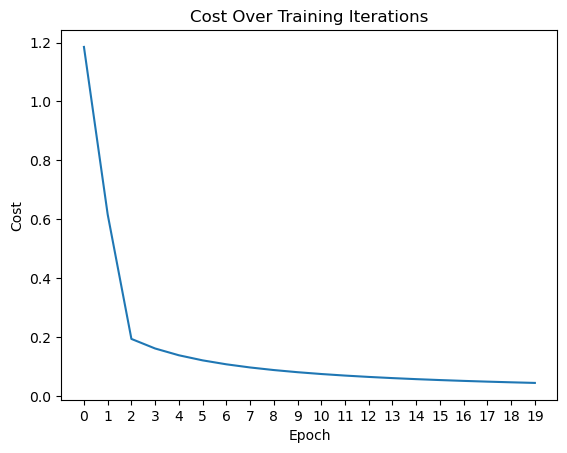

In [13]:
plt.plot(costs)
plt.title("Cost Over Training Iterations")
plt.xticks(np.arange(0, 20))
plt.xlabel("Epoch")
plt.ylabel("Cost");

#### Now for the moment of truth...
Is our function able to predict the labels of our data using the optimized parameters?

In [14]:
print("Predictions:")
print(sigmoid(W.T @ X + b).round(3))
print("Actual:")
print(Y)

Predictions:
[[0.014 0.055 0.908 0.981 0.025]]
Actual:
[0. 0. 1. 1. 0.]


These are pretty darn close! <br><br>
Since we need to predict a class (0 or 1), we'll use a simple rule: 
- If probability < 0.5 → class 0
- If probability ≥ 0.5 → class 1

In [15]:
pred = np.where(sigmoid(W.T @ X + b) < 0.5, 0, 1)

print(f"Predicted classes: {pred}")
print(f"Actual: {Y}")

Predicted classes: [[0 0 1 1 0]]
Actual: [0. 0. 1. 1. 0.]


### Accuracy 
Let's compute how many predictions we got right.

In [16]:
print(f"Accuracy: {100 - np.average(Y - pred)}%")

Accuracy: 100.0%


### We were able to correctly identify all of out data!
---

# Wrap-Up

In this notebook, we built **logistic regression from scratch** using NumPy.

We learned:
- How input features are combined with weights and bias
- How the sigmoid function converts outputs into probabilities
- How loss and cost functions guide learning
- How gradient descent updates parameters to reduce error
- How to evaluate predictions and model performance

Yes, the training data was small and intentionally rather simplistic. But for more complex problems, we do have many powerful techniques.

Even though logistic regression seems simple, it teaches the core principles behind how machine learning models learn. <br>
The principles here extend directly into neural networks and deep learning. 

---

Thanks for reading! 🎉  
I hope you learnt something new.  
If you enjoyed this, feel free to ⭐️ the repo or share it with others learning ML.